<a href="https://colab.research.google.com/github/Lucifer01719/Clg-ML-Lab/blob/main/ML_Lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak", category=UserWarning)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
data = {
    'Cust_ID': list(range(1, 21)),
    'Gender': ['Male','Male','Female','Female','Female','Female','Female','Female','Male','Female',
               'Male','Female','Female','Female','Male','Female','Male','Female','Male','Female'],
    'Age': [19,21,20,23,31,22,35,23,64,30,67,35,58,24,37,22,35,20,52,35],
    'Annual Income (K$)': [15,15,16,16,17,17,18,18,19,19,19,19,20,20,20,20,21,21,23,23],
    'Spending Score(1-100)': [39,81,6,77,40,76,6,94,3,72,14,99,15,77,13,79,35,66,29,98]
}

In [5]:
df = pd.DataFrame(data)

In [6]:
df = df.rename(columns={
    'Cust_ID': 'CustomerID',
    'Annual Income (K$)': 'Annual_Income',
    'Spending Score(1-100)': 'Spending_Score'
})

In [7]:
X = df[['Annual_Income', 'Spending_Score']]

In [8]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  # n_init=10 removes FutureWarning
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

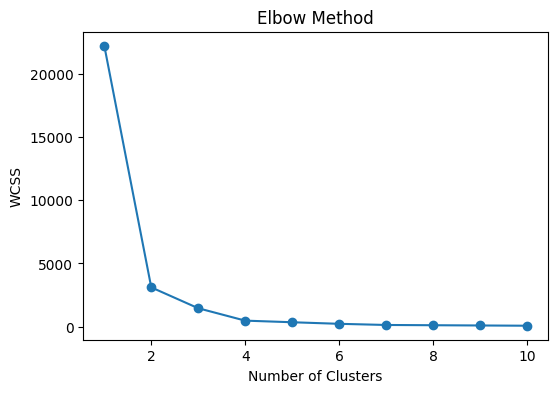

In [9]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

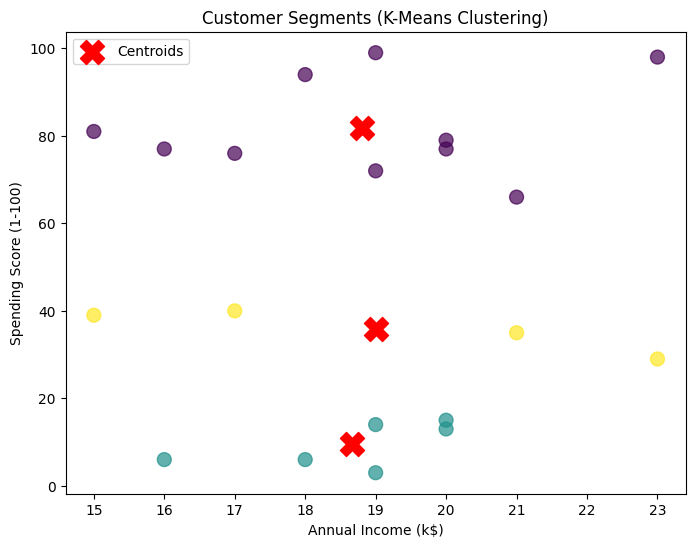

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df['Annual_Income'], df['Spending_Score'],
            c=df['Cluster'], cmap='viridis', s=100, alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segments (K-Means Clustering)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [12]:
print(df[['CustomerID', 'Annual_Income', 'Spending_Score', 'Cluster']])

    CustomerID  Annual_Income  Spending_Score  Cluster
0            1             15              39        2
1            2             15              81        0
2            3             16               6        1
3            4             16              77        0
4            5             17              40        2
5            6             17              76        0
6            7             18               6        1
7            8             18              94        0
8            9             19               3        1
9           10             19              72        0
10          11             19              14        1
11          12             19              99        0
12          13             20              15        1
13          14             20              77        0
14          15             20              13        1
15          16             20              79        0
16          17             21              35        2
17        